# Experiments (II)

In [86]:
from training import *
from NeuralNetwork import CrowdDataset, TordeuxNet
import pytorch_lightning as pl

import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Training the network

In [87]:
R_dataset = pd.read_csv('./data/Corridor_Data/Preprocessed/ug-180-060-normalized.csv')
R_dataset = R_dataset.drop('Unnamed: 0', axis=1)
B_dataset = pd.read_csv('./data/Bottleneck_Data/Preprocessed/uo-180-070-normalized.csv')
B_dataset = B_dataset.drop('Unnamed: 0', axis=1)

R_dataset = R_dataset.sample(n = 5000)
B_dataset = B_dataset.sample(n = 5000)

dataset = pd.concat([R_dataset, B_dataset])

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\caner\anaconda3\envs\mlcms\lib\site-packages\pytorch_lightning\trainer\trainer.py:1814: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 82    
------------------------------------
82        Trainable params
0         Non-trainable params
82        Total params
0.000     Total estimated model params size (MB)


(10000, 22)
                                                                                                                       

C:\Users\caner\anaconda3\envs\mlcms\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\caner\anaconda3\envs\mlcms\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  89%|█████████████████████████████████████████▋     | 250/282 [00:01<00:00, 144.70it/s, loss=0.059, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 1:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 147.35it/s, loss=0.0412, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 1:  98%|████████████████████████████████████████████▊ | 275/282 [00:01<00:00, 147.79it/s, loss=0.0412, v_num=198]


Epoch 2:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 149.43it/s, loss=0.0373, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 3:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 154.05it/s, loss=0.0388, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 3:  95%|███████████████████████████████████████████▉  | 269/282 [00:01<00:00, 154.61it/s, loss=0.0388, v_num=198]


Epoch 4:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 156.94it/s, loss=0.0365, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 5:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 146.57it/s, loss=0.0385, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 5:  94%|███████████████████████████████████████████   | 264/282 [00:01<00:00, 146.46it/s, loss=0.0385, v_num=198]


Epoch 6:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 163.28it/s, loss=0.0389, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 7:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 164.50it/s, loss=0.0377, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 7:  91%|██████████████████████████████████████████    | 258/282 [00:01<00:00, 163.91it/s, loss=0.0377, v_num=198]


Epoch 8:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 164.67it/s, loss=0.0384, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 9:  89%|████████████████████████████████████████▊     | 250/282 [00:01<00:00, 167.36it/s, loss=0.0394, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 9:  89%|█████████████████████████████████████████     | 252/282 [00:01<00:00, 166.46it/s, loss=0.0394, v_num=198]


Epoch 10:  89%|███████████████████████████████████████▉     | 250/282 [00:01<00:00, 166.28it/s, loss=0.0386, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 10: 100%|████████████████████████████████████████████▊| 281/282 [00:01<00:00, 168.65it/s, loss=0.0386, v_num=198]


Epoch 11:  89%|███████████████████████████████████████▉     | 250/282 [00:01<00:00, 166.27it/s, loss=0.0381, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 12:  89%|███████████████████████████████████████▉     | 250/282 [00:01<00:00, 165.64it/s, loss=0.0378, v_num=198]
Validation: 0it [00:00, ?it/s]
Epoch 12:  98%|███████████████████████████████████████████▉ | 275/282 [00:01<00:00, 167.10it/s, loss=0.0378, v_num=198]


Epoch 13:  89%|███████████████████████████████████████▉     | 250/282 [00:01<00:00, 166.92it/s, loss=0.0383, v_num=198]
Validation: 0it [00:00, ?it/s]
Predicting DataLoader 0: 100%|████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 414.17it/s]


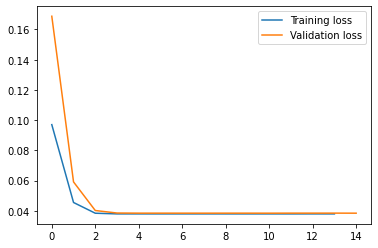

Last epoch training loss: 0.0379871129989624
Last epoch validation loss: 0.03846462815999985
Test MSE: 0.037037406116724014


In [88]:
args = {
    "lr": 1e-3,
    "k": 10
}

print(dataset.shape)

_, _, _, model = simple_train(model_args = args,
                              batch_size = 32,
                              max_epochs = 50,
                              dataset = dataset)

## Testing

In [89]:
predictor = pl.Trainer(gpus=1)

C:\Users\caner\anaconda3\envs\mlcms\lib\site-packages\pytorch_lightning\loops\utilities.py:92: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


### Corridor

`ug-180-030`:

In [90]:
R_30 = pd.read_csv('./data/Corridor_Data/Preprocessed/ug-180-030-normalized.csv')
R_30 = R_30.drop('Unnamed: 0', axis=1)
R_30 = R_30.sample(n = 5000)

data30 = DataLoader(CrowdDataset(R_30), shuffle = True)

In [91]:
predictions = predictor.predict(model, dataloaders = data30)
predictions = np.array(predictions)

print(f"Mean: {predictions.mean()}")
print(f"Std: {predictions.std()}")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 466.52it/s]
Mean: 0.022740228101611137
Std: 0.03345836326479912


`ug-180-085`:

In [92]:
R_85 = pd.read_csv('./data/Corridor_Data/Preprocessed/ug-180-085-normalized.csv')
R_85 = R_85.drop('Unnamed: 0', axis=1)
R_85 = R_85.sample(n = 5000)

data85 = DataLoader(CrowdDataset(R_85), shuffle = True)

In [93]:
predictions = predictor.predict(model, dataloaders = data85)
predictions = np.array(predictions)

print(f"Mean: {predictions.mean()}")
print(f"Std: {predictions.std()}")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 471.53it/s]
Mean: 0.025173956528306007
Std: 0.04204711318016052


### Bottleneck:

`uo-180-095`:

In [94]:
B_95 = pd.read_csv('./data/Bottleneck_Data/Preprocessed/uo-180-095-normalized.csv')
B_95 = B_95.drop('Unnamed: 0', axis=1)
B_95 = B_95.sample(n = 5000)

data95 = DataLoader(CrowdDataset(B_95), shuffle = True)

In [95]:
predictions = predictor.predict(model, dataloaders = data95)

predictions = np.array(predictions)

print(f"Mean: {predictions.mean()}")
print(f"Std: {predictions.std()}")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 472.09it/s]
Mean: 0.02438507042825222
Std: 0.029936855658888817


`uo-180-120`:

In [96]:
B_120 = pd.read_csv('./data/Bottleneck_Data/Preprocessed/uo-180-120-normalized.csv')
B_120 = B_120.drop('Unnamed: 0', axis=1)
B_120 = B_120.sample(n = 5000)

data120 = DataLoader(CrowdDataset(B_120), shuffle = True)

In [97]:
predictions = predictor.predict(model, dataloaders = data120)

predictions = np.array(predictions)

print(f"Mean: {predictions.mean()}")
print(f"Std: {predictions.std()}")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 449.14it/s]
Mean: 0.018909702077507973
Std: 0.02580440603196621
